#### Question 03: Write a program, which would download the data from the provided link, and then read the data and convert that into properly structured data and return it in Excel format.
Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json

In [65]:
#import necessary library and tools
import warnings
import numpy as np
import pandas as pd
import json
import seaborn as sns
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#converting json t csv
def enter_data(dataset):
    data=pd.read_json(dataset)
    df=pd.json_normalize(data['pokemon'])
    df_ex=df.to_excel('pokemon.xlsx',index=False)
    return df_ex

In [3]:
enter_data('https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json')

#### Q 6

### Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
##### Draw plots to demonstrate the analysis for the following questions for better visualizations.
2. Write code comments wherever required for code understanding
Insights to be drawn -
*  Get all Pokemons whose spawn rate is less than 5%
*  Get all Pokemons that have less than 4 weaknesses
*  Get all Pokemons that have no multipliers at all
*  Get all Pokemons that do not have more than 2 evolutions
*  Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
*  Get all Pokemon who have more than two types of capabilities

In [4]:
#ingesting excel data
pokemon_data=pd.read_excel('pokemon.xlsx')
pokemon_data.reset_index
pokemon_data.head(3)

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."


In [16]:
pokemon_data.shape

(151, 17)

In [90]:
#Get all Pokemons whose spawn rate is less than 5%
spawn_rate=pokemon_data[pokemon_data['spawn_chance']<=0.05]
name=spawn_rate['name'].values
print(f'Pokemons whose spawn rate is less than 5% are: {name}')

Pokemons whose spawn rate is less than 5% are: ['Ivysaur' 'Venusaur' 'Charmeleon' 'Charizard' 'Wartortle' 'Blastoise'
 'Butterfree' 'Raichu' 'Sandslash' 'Nidoqueen' 'Nidoking' 'Clefable'
 'Ninetales' 'Wigglytuff' 'Vileplume' 'Dugtrio' 'Persian' 'Primeape'
 'Arcanine' 'Poliwrath' 'Kadabra' 'Alakazam' 'Machoke' 'Machamp'
 'Victreebel' 'Golem' 'Rapidash' 'Slowbro' 'Magneton' "Farfetch'd"
 'Dewgong' 'Muk' 'Cloyster' 'Gengar' 'Electrode' 'Exeggutor' 'Marowak'
 'Hitmonlee' 'Hitmonchan' 'Lickitung' 'Weezing' 'Rhydon' 'Chansey'
 'Kangaskhan' 'Seadra' 'Starmie' 'Mr. Mime' 'Gyarados' 'Lapras' 'Ditto'
 'Vaporeon' 'Jolteon' 'Flareon' 'Porygon' 'Omastar' 'Kabutops'
 'Aerodactyl' 'Snorlax' 'Articuno' 'Zapdos' 'Moltres' 'Dragonair'
 'Dragonite' 'Mewtwo' 'Mew']


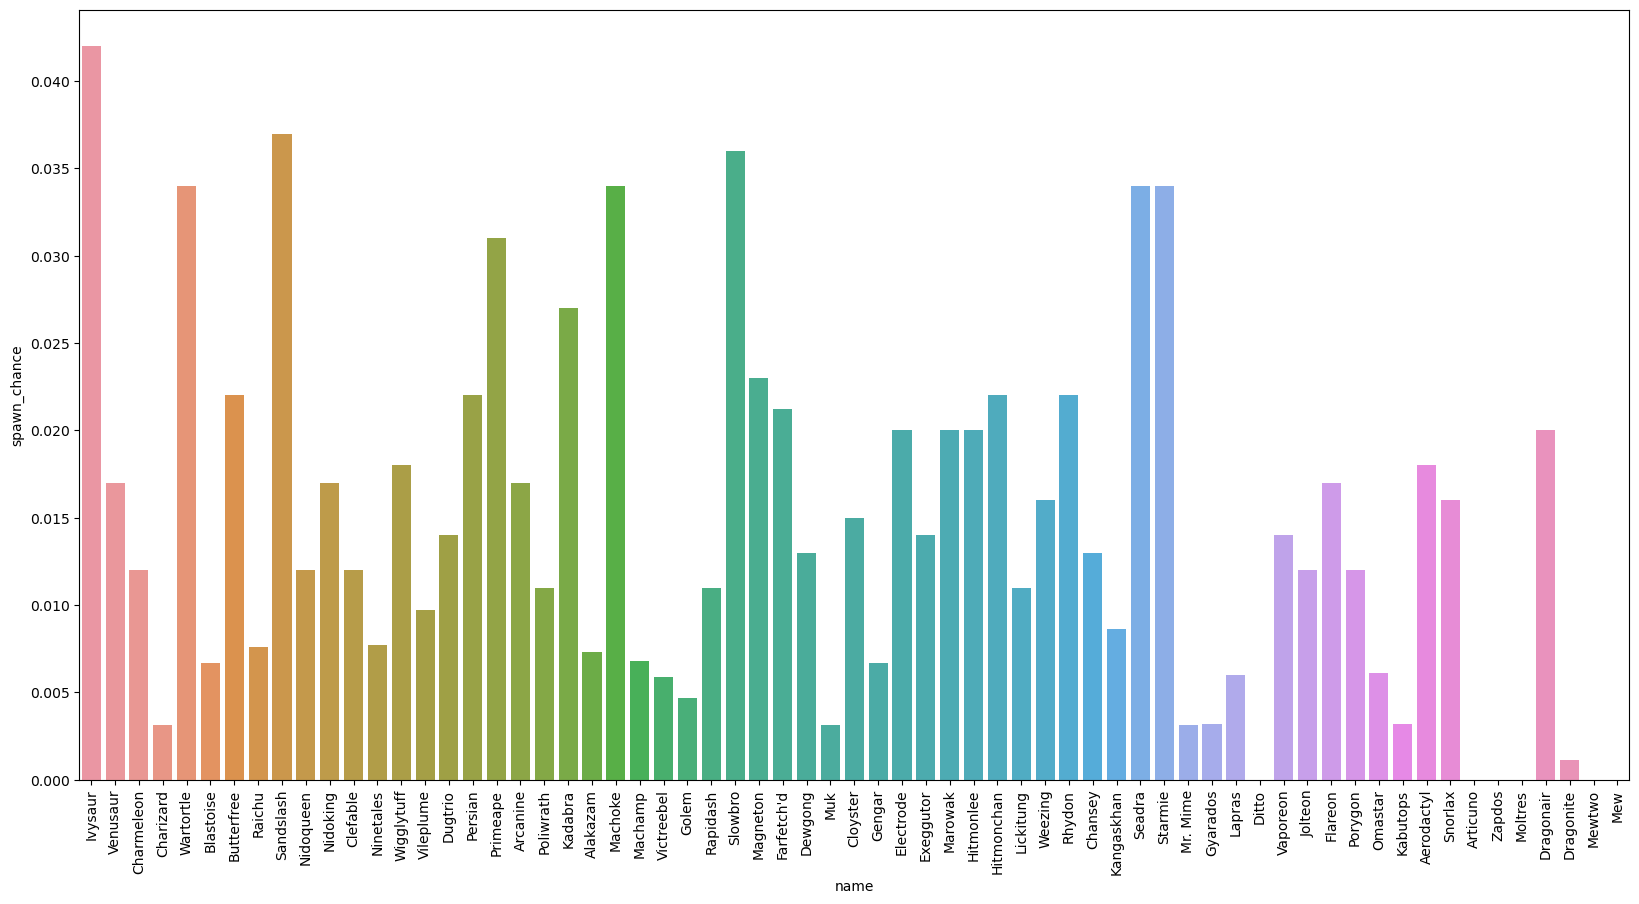

In [94]:
axs,fig =plt.subplots(1,1,figsize=(20,10))
plt.subplot(111)
sns.barplot(data=spawn_rate,x='name', y='spawn_chance')
plt.xticks(rotation=90)
plt.show()

Pokemons that do not have more than 4 weaknesses: ['Bulbasaur' 'Ivysaur' 'Venusaur' 'Charmander' 'Charmeleon' 'Charizard'
 'Squirtle' 'Wartortle' 'Blastoise' 'Caterpie' 'Metapod' 'Butterfree'
 'Weedle' 'Kakuna' 'Beedrill' 'Pidgey' 'Pidgeotto' 'Pidgeot' 'Rattata'
 'Raticate' 'Spearow' 'Fearow' 'Ekans' 'Arbok' 'Pikachu' 'Raichu'
 'Sandshrew' 'Sandslash' 'Nidoran ♀ (Female)' 'Nidorina' 'Nidoqueen'
 'Nidoran ♂ (Male)' 'Nidorino' 'Nidoking' 'Clefairy' 'Clefable' 'Vulpix'
 'Ninetales' 'Jigglypuff' 'Wigglytuff' 'Zubat' 'Golbat' 'Oddish' 'Gloom'
 'Vileplume' 'Paras' 'Parasect' 'Venonat' 'Venomoth' 'Diglett' 'Dugtrio'
 'Meowth' 'Persian' 'Psyduck' 'Golduck' 'Mankey' 'Primeape' 'Growlithe'
 'Arcanine' 'Poliwag' 'Poliwhirl' 'Poliwrath' 'Abra' 'Kadabra' 'Alakazam'
 'Machop' 'Machoke' 'Machamp' 'Bellsprout' 'Weepinbell' 'Victreebel'
 'Tentacool' 'Tentacruel' 'Geodude' 'Graveler' 'Golem' 'Ponyta' 'Rapidash'
 'Slowpoke' 'Slowbro' 'Magnemite' 'Magneton' "Farfetch'd" 'Doduo' 'Dodrio'
 'Seel' 'Dewgong' 

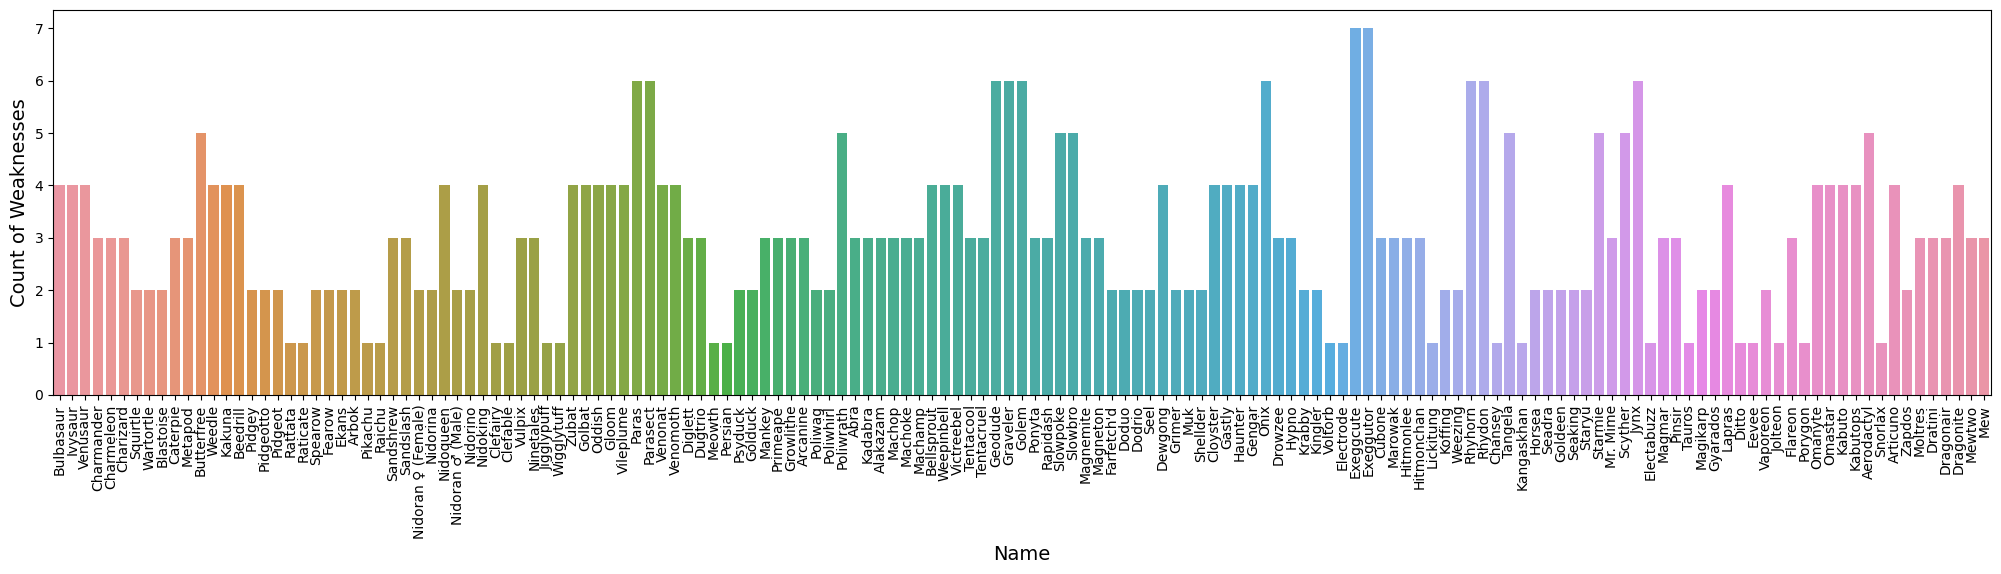

In [251]:
#Get all Pokemons that have less than 4 weaknesses
weak=[]
poke_weakness=pokemon_data.copy()
for i in poke_weakness['weaknesses']:
    count=len(i.split(','))
    weak.append(count)
poke_weakness['count_weaknesses']=weak
if (poke_weakness['count_weaknesses'].any())<4:
        poke_weakness[poke_weakness['count_weaknesses']==i]
        name=poke_weakness['name'].values
poke_weakness['name']=name
print(f'Pokemons that do not have more than 4 weaknesses: {name}')


axs,fig =plt.subplots(1,1,figsize=(25,5))
plt.subplot(111)
sns.barplot(data=poke_weakness,x='name', y='count_weaknesses')
plt.xlabel("Name", size=14) 
plt.ylabel("Count of Weaknesses", size=14)
plt.xticks(rotation=90)
plt.show()

In [252]:
#Get all Pokemons that have no multipliers at all
null_multi=pokemon_data[pokemon_data['multipliers'].isna()]
names=null_multi['name'].values
print(f'Pokemons that have no multipliers at all are: {names}')

Pokemons that have no multipliers at all are: ['Venusaur' 'Charizard' 'Blastoise' 'Butterfree' 'Beedrill' 'Pidgeot'
 'Raticate' 'Fearow' 'Arbok' 'Raichu' 'Sandslash' 'Nidoqueen' 'Nidoking'
 'Clefable' 'Ninetales' 'Wigglytuff' 'Golbat' 'Vileplume' 'Parasect'
 'Venomoth' 'Dugtrio' 'Persian' 'Golduck' 'Primeape' 'Arcanine'
 'Poliwrath' 'Alakazam' 'Machamp' 'Victreebel' 'Tentacruel' 'Golem'
 'Rapidash' 'Slowbro' 'Magneton' "Farfetch'd" 'Dodrio' 'Dewgong' 'Muk'
 'Cloyster' 'Gengar' 'Onix' 'Hypno' 'Kingler' 'Electrode' 'Exeggutor'
 'Marowak' 'Hitmonlee' 'Hitmonchan' 'Lickitung' 'Weezing' 'Rhydon'
 'Chansey' 'Tangela' 'Kangaskhan' 'Seadra' 'Seaking' 'Starmie' 'Mr. Mime'
 'Scyther' 'Jynx' 'Electabuzz' 'Magmar' 'Pinsir' 'Tauros' 'Gyarados'
 'Lapras' 'Ditto' 'Vaporeon' 'Jolteon' 'Flareon' 'Porygon' 'Omastar'
 'Kabutops' 'Aerodactyl' 'Snorlax' 'Articuno' 'Zapdos' 'Moltres'
 'Dragonite' 'Mewtwo' 'Mew']


In [226]:
poke_evol=pokemon_data.copy()
poke_evol1=poke_evol[poke_evol['next_evolution'].notnull()]
poke_evol2=poke_evol[poke_evol['prev_evolution'].notnull()]

In [215]:
poke_evol2.shape

(72, 18)

In [260]:
#Get all Pokemons that do not have more than 2 evolutions
pp1=[]
for i in poke_evol2['prev_evolution']:
    count=len(i.split(','))
    pp1.append(count)
poke_evol2['count1']=pp1
if (poke_evol2['count1'].any())<=2:
        poke_evol2[poke_evol2['prev_evolution']==i]
        name=poke_evol2['name'].values
poke_evol2['name']=name
print(f'Pokemons that do not have more than 2 previous evolutions: {name}')

pp2=[]
for i in poke_evol1['next_evolution']:
    count=len(i.split(','))
    pp2.append(count)
poke_evol1['count2']=pp2
if (poke_evol1['count2'].any())<=2:
        poke_evol1[poke_evol1['next_evolution']==i]
        name=poke_evol1['name'].values
poke_evol1['name']=name
print(f'Pokemons that do not have more than 2 next evolutions: {name}') 

Pokemons that do not have more than 2 previous evolutions: ['Ivysaur' 'Venusaur' 'Charmeleon' 'Charizard' 'Wartortle' 'Blastoise'
 'Metapod' 'Butterfree' 'Kakuna' 'Beedrill' 'Pidgeotto' 'Pidgeot'
 'Raticate' 'Fearow' 'Arbok' 'Raichu' 'Sandslash' 'Nidorina' 'Nidoqueen'
 'Nidorino' 'Nidoking' 'Clefable' 'Ninetales' 'Wigglytuff' 'Golbat'
 'Gloom' 'Vileplume' 'Parasect' 'Venomoth' 'Dugtrio' 'Persian' 'Golduck'
 'Primeape' 'Arcanine' 'Poliwhirl' 'Poliwrath' 'Kadabra' 'Alakazam'
 'Machoke' 'Machamp' 'Weepinbell' 'Victreebel' 'Tentacruel' 'Graveler'
 'Golem' 'Rapidash' 'Slowbro' 'Magneton' 'Dodrio' 'Dewgong' 'Muk'
 'Cloyster' 'Haunter' 'Gengar' 'Hypno' 'Kingler' 'Electrode' 'Exeggutor'
 'Marowak' 'Weezing' 'Rhydon' 'Seadra' 'Seaking' 'Starmie' 'Gyarados'
 'Vaporeon' 'Jolteon' 'Flareon' 'Omastar' 'Kabutops' 'Dragonair'
 'Dragonite']
Pokemons that do not have more than 2 next evolutions: ['Bulbasaur' 'Ivysaur' 'Charmander' 'Charmeleon' 'Squirtle' 'Wartortle'
 'Caterpie' 'Metapod' 'Weedle' 'Kaku

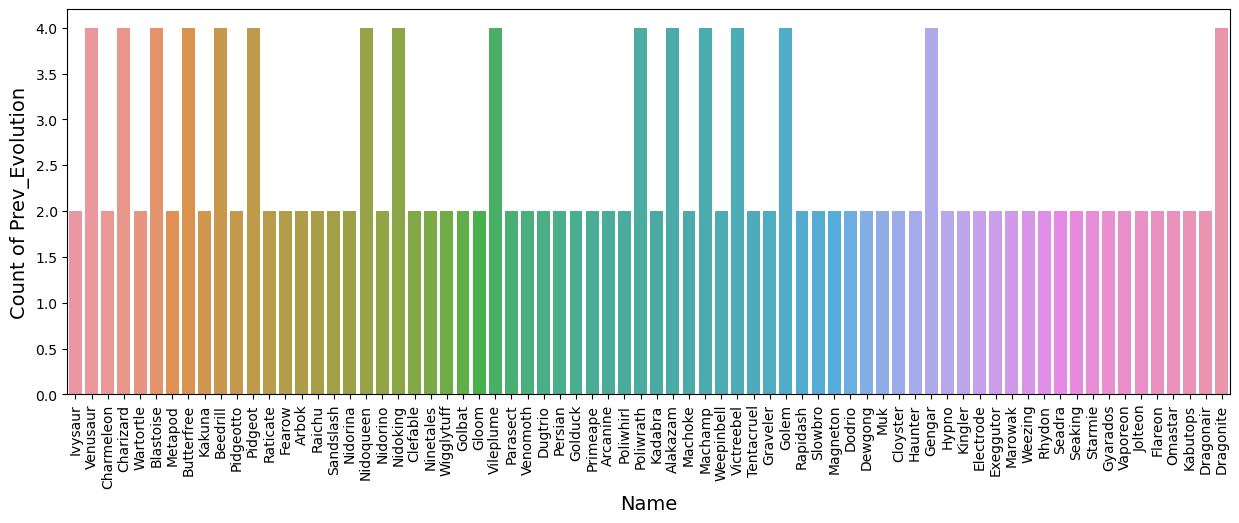

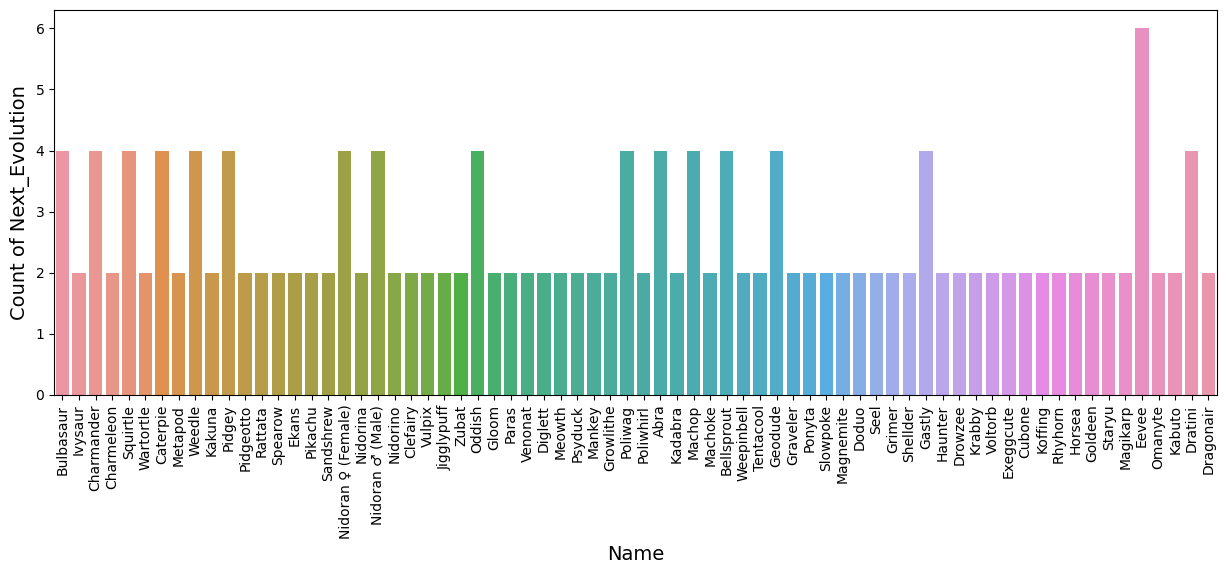

In [307]:

axs,fig =plt.subplots(1,1,figsize=(15,5))
plt.subplot(111)
sns.barplot(data=poke_evol2,x='name', y='count1')
plt.xlabel("Name", size=14) 
plt.ylabel("Count of Prev_Evolution", size=14)
plt.xticks(rotation=90)
axs,fig =plt.subplots(1,1,figsize=(15,5))
plt.subplot(111)
sns.barplot(data=poke_evol1,x='name', y='count2')
plt.xlabel("Name", size=14) 
plt.ylabel("Count of Next_Evolution", size=14)
plt.xticks(rotation=90)
plt.show()

In [265]:
spawn_time=pokemon_data.copy()
spawn_time['spawn_time'].fillna(0, inplace=True)

In [314]:
#Get all Pokemons whose spawn time is less than 300 seconds. 
#Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
ti=[]
for i in spawn_time['spawn_time']:
    if i==0:
        time_sec=0
    if i!=0:
        time=i.split(':')
        time_min=int(time[0])*60
        time_sec=time_min + int(time[1])
    ti.append(time_sec)
spawn_time['time_sec']=ti
if (spawn_time['time_sec'].any())<=300:
        spawn_time[spawn_time['time_sec']==i]
        name=spawn_time['name'].values
#spawn_time['name'].values=name
print(f'Pokemons that do not have more than 300 sec spawn time: {name}') 



Pokemons that do not have more than 300 sec spawn time: ['Bulbasaur' 'Ivysaur' 'Venusaur' 'Charmander' 'Charmeleon' 'Charizard'
 'Squirtle' 'Wartortle' 'Blastoise' 'Caterpie' 'Metapod' 'Butterfree'
 'Weedle' 'Kakuna' 'Beedrill' 'Pidgey' 'Pidgeotto' 'Pidgeot' 'Rattata'
 'Raticate' 'Spearow' 'Fearow' 'Ekans' 'Arbok' 'Pikachu' 'Raichu'
 'Sandshrew' 'Sandslash' 'Nidoran ♀ (Female)' 'Nidorina' 'Nidoqueen'
 'Nidoran ♂ (Male)' 'Nidorino' 'Nidoking' 'Clefairy' 'Clefable' 'Vulpix'
 'Ninetales' 'Jigglypuff' 'Wigglytuff' 'Zubat' 'Golbat' 'Oddish' 'Gloom'
 'Vileplume' 'Paras' 'Parasect' 'Venonat' 'Venomoth' 'Diglett' 'Dugtrio'
 'Meowth' 'Persian' 'Psyduck' 'Golduck' 'Mankey' 'Primeape' 'Growlithe'
 'Arcanine' 'Poliwag' 'Poliwhirl' 'Poliwrath' 'Abra' 'Kadabra' 'Alakazam'
 'Machop' 'Machoke' 'Machamp' 'Bellsprout' 'Weepinbell' 'Victreebel'
 'Tentacool' 'Tentacruel' 'Geodude' 'Graveler' 'Golem' 'Ponyta' 'Rapidash'
 'Slowpoke' 'Slowbro' 'Magnemite' 'Magneton' "Farfetch'd" 'Doduo' 'Dodrio'
 'Seel' 'Dew

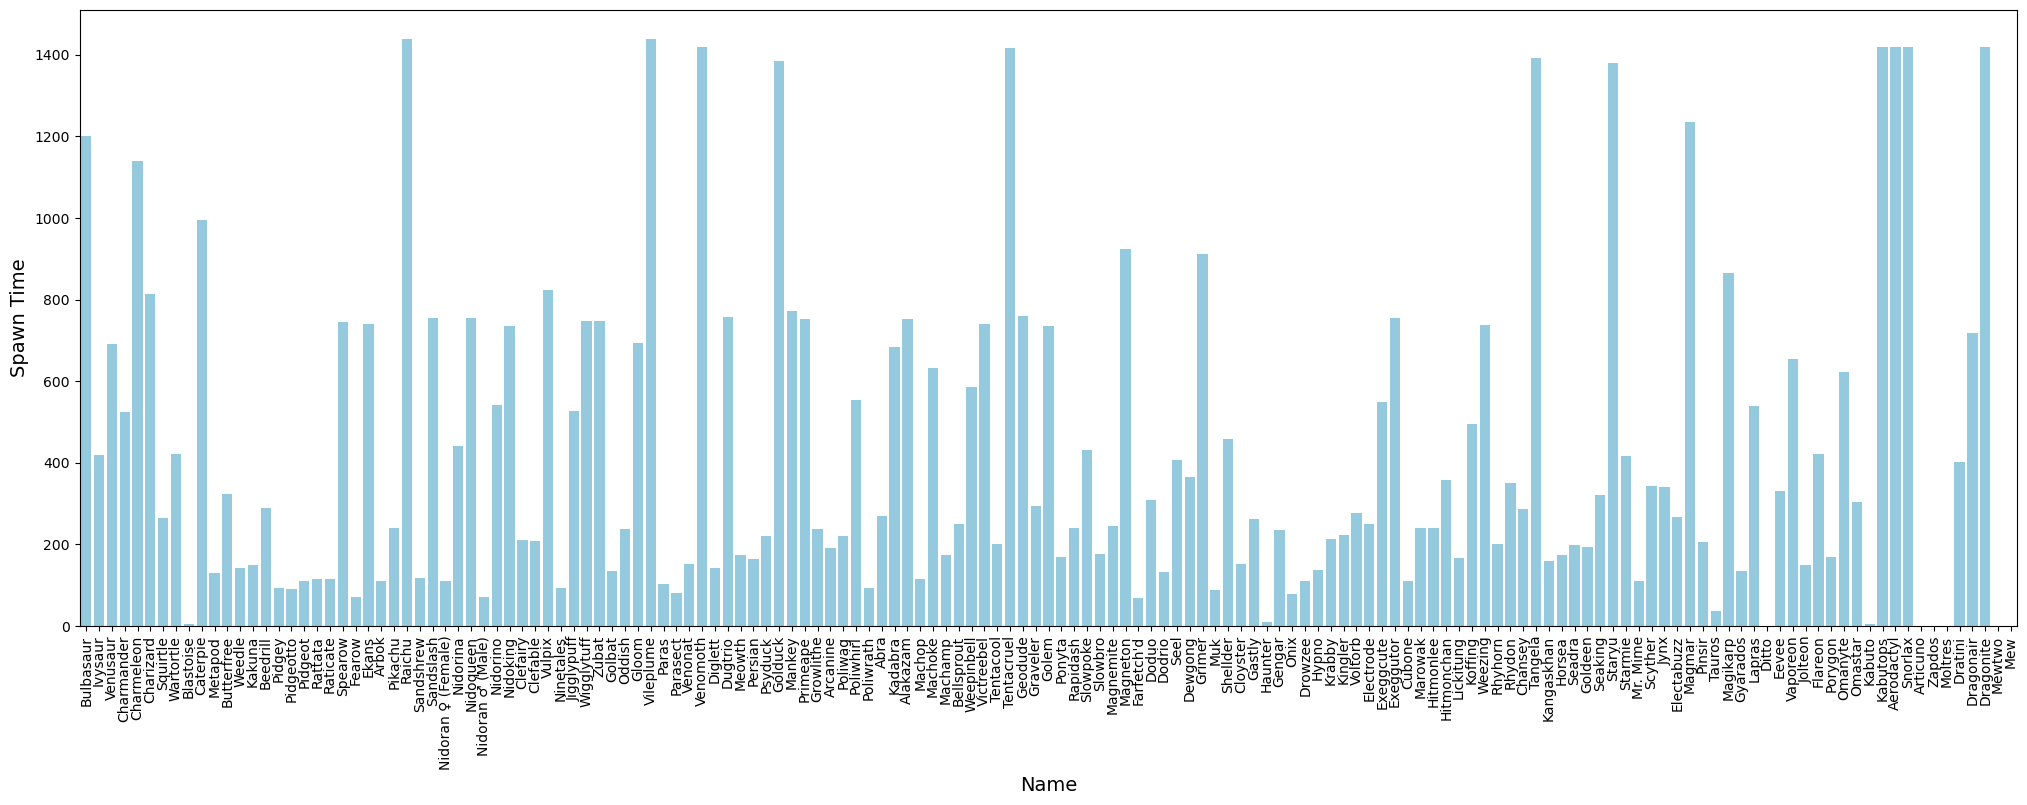

In [301]:

axs,fig =plt.subplots(1,1,figsize=(25,8))
plt.subplot(111)
sns.barplot(data=spawn_time,x='name', y='time_sec',color='skyblue')
plt.xlabel("Name", size=14) 
plt.ylabel("Spawn Time", size=14)
plt.xticks(rotation=90)
plt.show()

In [319]:
#Get all Pokemon who have more than two types of capabilities
poke_cap=pokemon_data.copy()
cp=[]
for i in poke_cap['type']:
    count=len(i.split(','))
    cp.append(count)
poke_cap['type_count']=cp
print(poke_cap['type_count'].value_counts())
if (poke_cap['type_count'].any())>=2:
        poke_cap[poke_cap['type_count']==i]
        name=poke_cap['type_count'].values
print(f'Pokemons that do not have more than 2 capability: {name}') 


1    89
2    62
Name: type_count, dtype: int64
Pokemons that do not have more than 2 capability: ['Bulbasaur' 'Ivysaur' 'Venusaur' 'Charmander' 'Charmeleon' 'Charizard'
 'Squirtle' 'Wartortle' 'Blastoise' 'Caterpie' 'Metapod' 'Butterfree'
 'Weedle' 'Kakuna' 'Beedrill' 'Pidgey' 'Pidgeotto' 'Pidgeot' 'Rattata'
 'Raticate' 'Spearow' 'Fearow' 'Ekans' 'Arbok' 'Pikachu' 'Raichu'
 'Sandshrew' 'Sandslash' 'Nidoran ♀ (Female)' 'Nidorina' 'Nidoqueen'
 'Nidoran ♂ (Male)' 'Nidorino' 'Nidoking' 'Clefairy' 'Clefable' 'Vulpix'
 'Ninetales' 'Jigglypuff' 'Wigglytuff' 'Zubat' 'Golbat' 'Oddish' 'Gloom'
 'Vileplume' 'Paras' 'Parasect' 'Venonat' 'Venomoth' 'Diglett' 'Dugtrio'
 'Meowth' 'Persian' 'Psyduck' 'Golduck' 'Mankey' 'Primeape' 'Growlithe'
 'Arcanine' 'Poliwag' 'Poliwhirl' 'Poliwrath' 'Abra' 'Kadabra' 'Alakazam'
 'Machop' 'Machoke' 'Machamp' 'Bellsprout' 'Weepinbell' 'Victreebel'
 'Tentacool' 'Tentacruel' 'Geodude' 'Graveler' 'Golem' 'Ponyta' 'Rapidash'
 'Slowpoke' 'Slowbro' 'Magnemite' 'Magneton' "

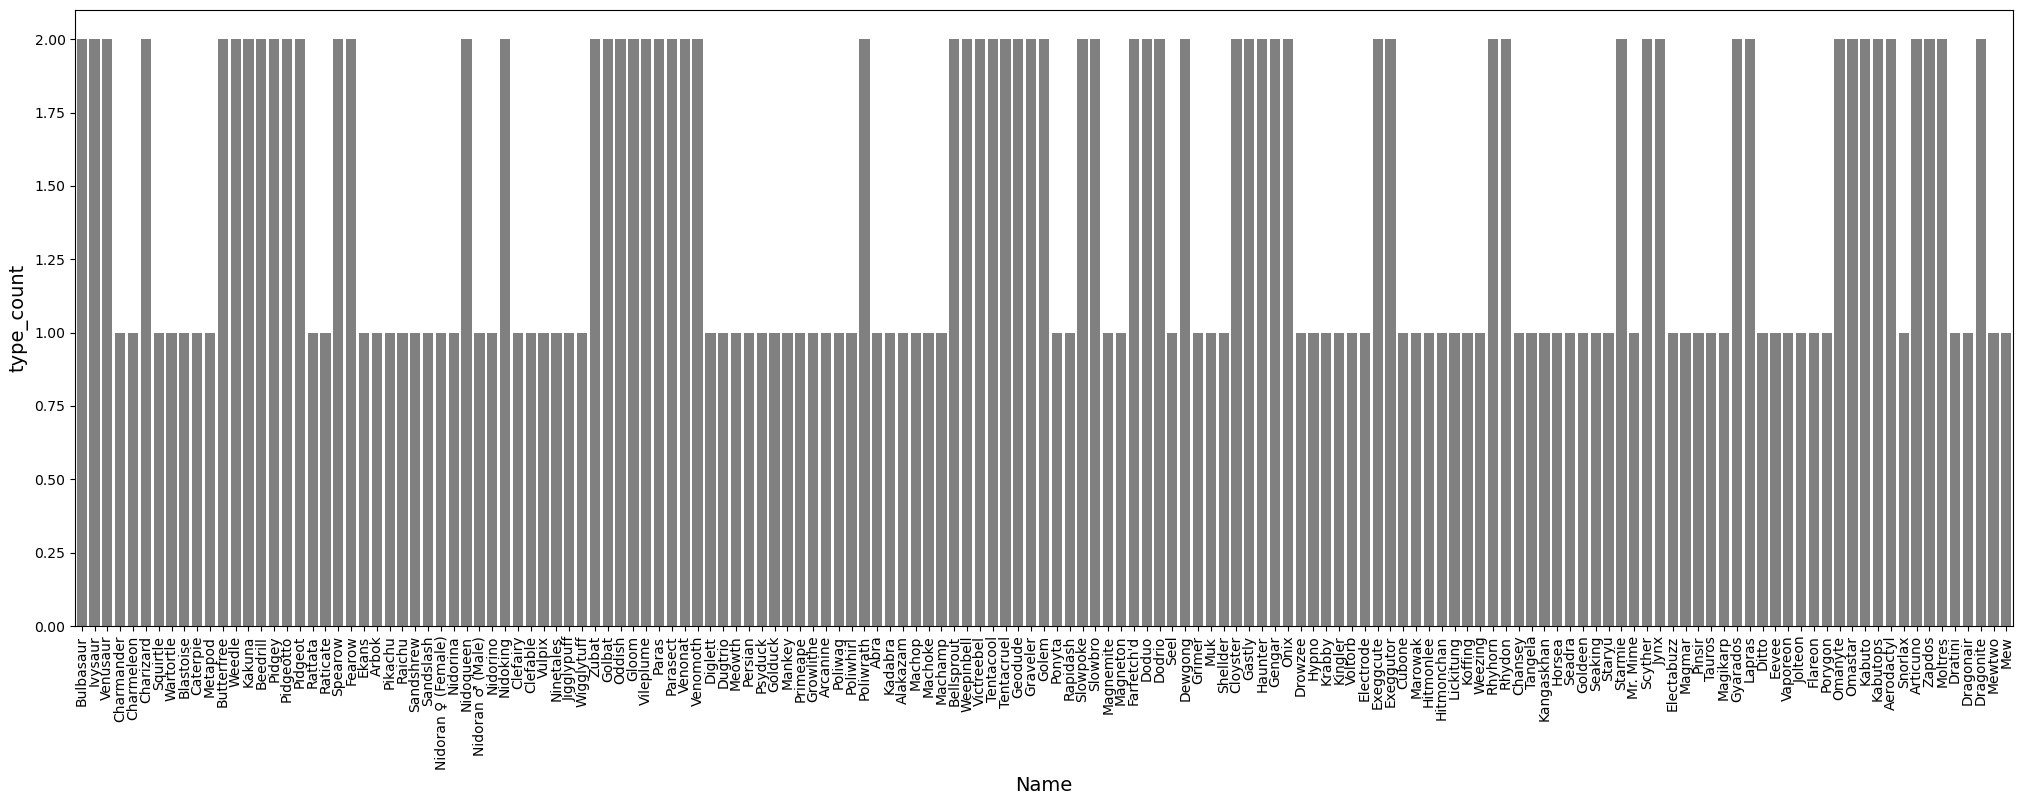

In [320]:
axs,fig =plt.subplots(1,1,figsize=(25,8))
plt.subplot(111)
sns.barplot(data=poke_cap,x='name', y='type_count',color='grey')
plt.xlabel("Name", size=14) 
plt.ylabel("type_count", size=14)
plt.xticks(rotation=90)
plt.show()